# Esercizio 11.1

In [24]:
#f(x) = a + b*x + c*x^2 + d*x^3
a = 4
b = -3 
c = -2
d = 3

In [25]:
import numpy as np

# generate training inputs
np.random.seed(0)
x_train = np.random.uniform(-1, 1, 500)
x_valid = np.random.uniform(-1, 1, 50)
x_valid.sort()
y_target = a + b*x_valid + c * x_valid * x_valid + d * x_valid * x_valid * x_valid # ideal (target) linear function

sigma = 0.3 # noise standard deviation, for the moment it is absent
y_train = np.random.normal(a + b*x_train + c * x_train * x_train + d * x_train * x_train * x_train, sigma) # actual measures from which we want to guess regression parameters
y_valid = np.random.normal(a + b*x_valid + c * x_valid * x_valid + d * x_valid * x_valid * x_valid, sigma)

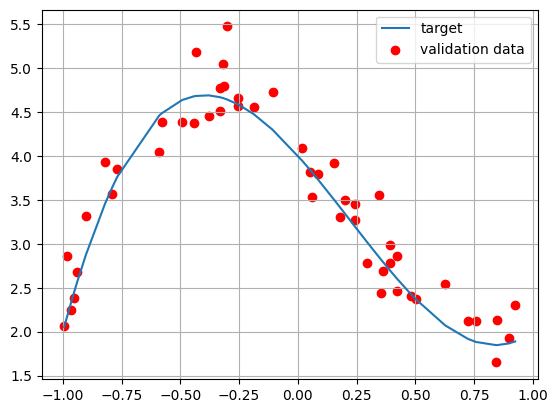

In [26]:
# plot validation and target dataset
import matplotlib.pyplot as plt
plt.plot(x_valid, y_target, label='target')
plt.scatter(x_valid, y_valid, color='r', label='validation data')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
# compose the NN model
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import backend as K
from tensorflow.keras.utils import get_custom_objects

model = tf.keras.Sequential()
model.add(Dense(1, input_shape=(1,), activation='relu')) # input layer with one neuron and linear activation
model.add(Dense(30, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(90, activation='relu'))
model.add(Dense(60, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(1)) # output layer with one neuron and linear activation



# compile the model choosing optimizer, loss and metrics objects
model.compile(optimizer='sgd', loss='mse', metrics=['mse'])

In [28]:
# get a summary of our composed model
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_23 (Dense)                │ (None, 1)              │             2 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 30)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_25 (Dense)                │ (None, 60)             │         1,860 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 90)             │         5,490 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 90)             │         8,190 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 60)             │         5,460 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 30)             │         1,830 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,923 (89.54 KB)

 Trainable params: 22,923 (89.54 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
# fit the model using training dataset
# over 10 epochs of 32 batch size each
# report training progress against validation data
history = model.fit(x=x_train, y=y_train, 
          batch_size=32, epochs=200,
          shuffle=True, # a good idea is to shuffle input before at each epoch
          validation_data=(x_valid, y_valid))

Epoch 1/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 9.6980 - mse: 9.6980 - val_loss: 1.6872 - val_mse: 1.6872
Epoch 2/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.3384 - mse: 1.3384 - val_loss: 0.9135 - val_mse: 0.9135
Epoch 3/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.9410 - mse: 0.9410 - val_loss: 0.7452 - val_mse: 0.7452
Epoch 4/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.7173 - mse: 0.7173 - val_loss: 0.5312 - val_mse: 0.5312
Epoch 5/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.4527 - mse: 0.4527 - val_loss: 0.5126 - val_mse: 0.5126
Epoch 6/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3968 - mse: 0.3968 - val_loss: 0.5162 - val_mse: 0.5162
Epoch 7/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3775 - mse: 0.3775 - val_loss: 0.4703 - val_mse: 0.4703
Epoch 8/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.3617 - mse: 0.3617 - val_loss: 0.4717 - val_mse: 0.4717
Epoch 9/200
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.41

In [30]:
# return weights and biases
model.get_weights()

[array([[1.0647976]], dtype=float32),
 array([0.10093177], dtype=float32),
 array([[-0.31075743, -0.4036209 ,  0.02534129,  0.28324106,  0.41233063,
         -0.32369995,  0.05006309,  0.24602793,  0.20242216,  0.32147485,
         -0.29960278,  0.02546414, -0.0894213 , -0.12112582, -0.2135109 ,
         -0.04993582, -0.20009682,  0.48413438, -0.1499444 ,  0.19259423,
         -0.03442486, -0.28366545,  0.24798435,  0.2886896 , -0.41827303,
          0.41492903,  0.01797589, -0.22162627, -0.25102186,  0.48539662]],
       dtype=float32),
 array([ 0.        ,  0.        ,  0.02936517, -0.0042684 , -0.00733726,
         0.        ,  0.0284548 ,  0.01596043,  0.03605856, -0.00573901,
         0.        ,  0.05622353,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        , -0.00329199,  0.        ,  0.06989169,
         0.0850059 ,  0.        ,  0.05854803, -0.00537875,  0.        ,
         0.02066756,  0.0639532 ,  0.        ,  0.        , -0.00596986],
       dtype=floa

In [31]:
# evaluate model
score = model.evaluate(x_valid, y_valid, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.5590 - mse: 0.5590

Test loss: 0.4891536831855774
Test accuracy: 0.4891536831855774


In [32]:
# evaluate model with the exact curve
score = model.evaluate(x_valid, y_target, batch_size=32, verbose=1)

# print performance
print()
print('Test loss:', score[0])
print('Test accuracy:', score[1])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5196 - mse: 0.5196

Test loss: 0.4392712116241455
Test accuracy: 0.4392712116241455


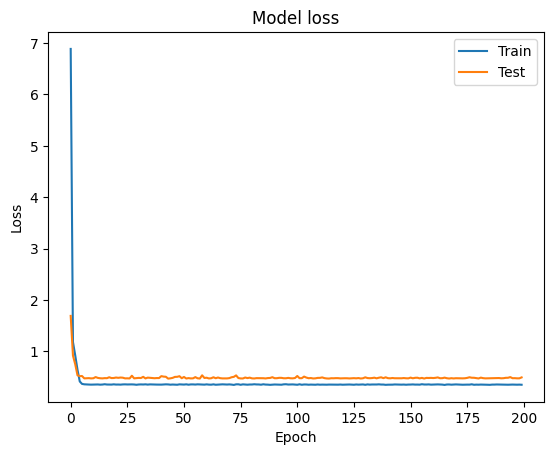

In [33]:
# look into training history
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='best')
plt.show()

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x15d4ae8b0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


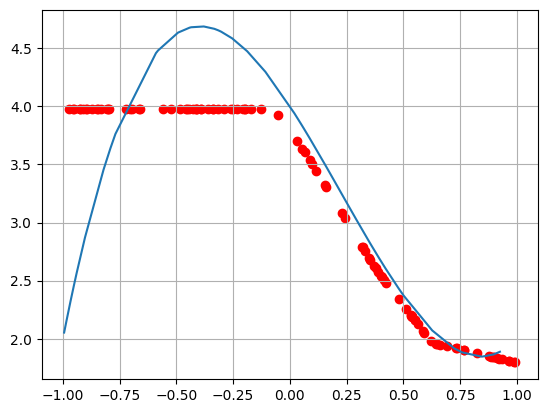

In [34]:
x_predicted = np.random.uniform(-1, 1, 100)
y_predicted = model.predict(x_predicted)
plt.scatter(x_predicted, y_predicted,color='r')
plt.plot(x_valid, y_target)
plt.grid(True)
plt.show()